In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import re

df_links=pd.read_csv("../dataset/links.csv",sep=",")
df_movies=pd.read_csv("../dataset/movies.csv",sep=",",quotechar='"')
df_ratings=pd.read_csv("../dataset/ratings.csv",sep=",")
df_tags=pd.read_csv("../dataset/tags.csv",sep=",")

ANALISI MOVIE

In [2]:
def extract_year(title):
    match = re.search(r"\((\d{4})\)", title)
    return int(match.group(1)) if match else None

def remove_year_from_title(title):
    return re.sub(r"\s*\(\d{4}\)", "", title)

Index(['movieId', 'title', 'genres'], dtype='object')
Distribuzione dei generi:
genres_list
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


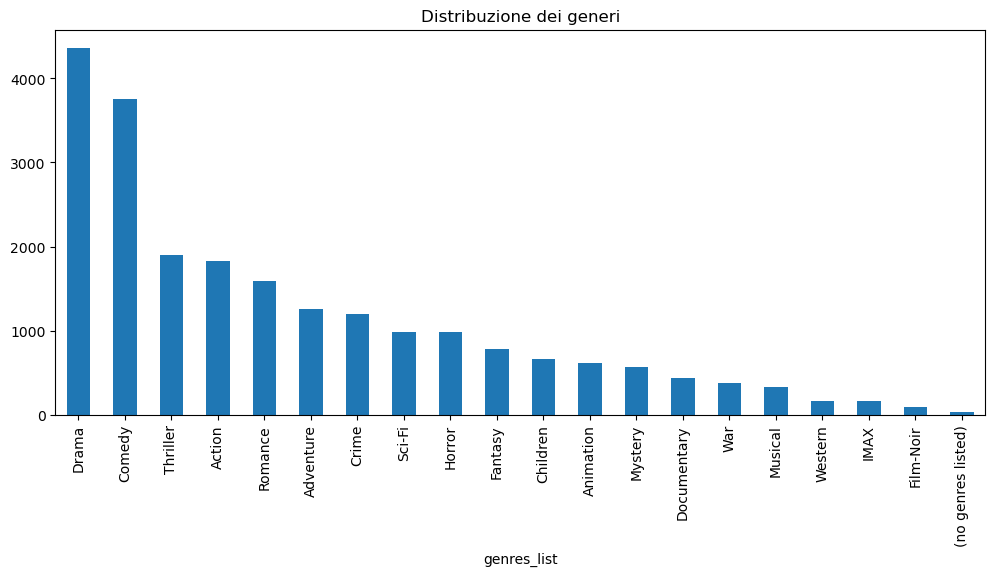


Film con più generi:
                                                  title  \
7441                                      Rubber (2010)   
5556  Patlabor: The Movie (Kidô keisatsu patorebâ: T...   
7170          Aelita: The Queen of Mars (Aelita) (1924)   
1390                                       Mulan (1998)   
5819                                      Robots (2005)   
6626                                   Enchanted (2007)   
2250                    Who Framed Roger Rabbit? (1988)   
7550                             Mars Needs Moms (2011)   
6145                                       Pulse (2006)   
7467                                     Tangled (2010)   

                                                 genres  num_genres  
7441  Action|Adventure|Comedy|Crime|Drama|Film-Noir|...          10  
5556  Action|Animation|Crime|Drama|Film-Noir|Mystery...           8  
7170  Action|Adventure|Drama|Fantasy|Romance|Sci-Fi|...           7  
1390  Adventure|Animation|Children|Comedy|Drama|

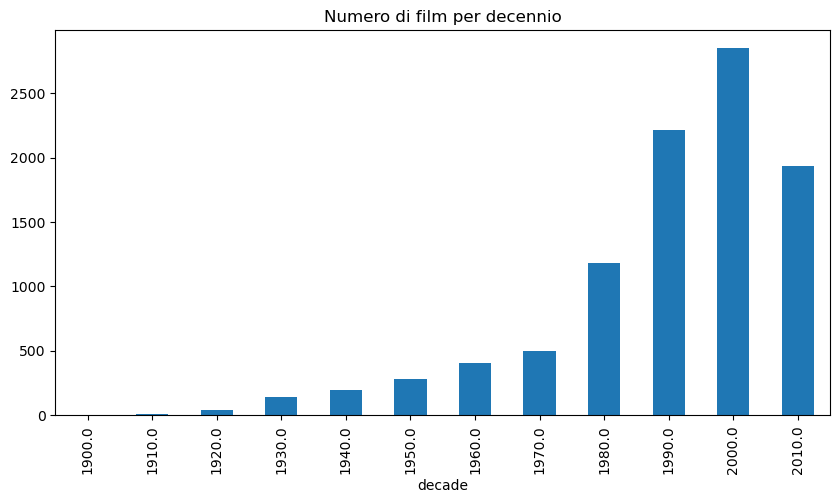

In [3]:
print(df_movies.columns) #['movieId,title,genres']
# ─────────────────────────────────────────────
# 1. DISTRIBUZIONE DEI GENERI
# ─────────────────────────────────────────────
# split della colonna generi
df_movies['genres_list'] = df_movies['genres'].apply(lambda x: x.split("|"))

df_mlist=df_movies.copy()#dataset con liste per i generi

# esplode in righe singole
df_genres_exploded = df_movies.explode('genres_list')

# distribuzione
genre_counts = df_genres_exploded['genres_list'].value_counts()

print("Distribuzione dei generi:")
print(genre_counts)

# grafico (opzionale)
genre_counts.plot(kind="bar", figsize=(12,5))
plt.title("Distribuzione dei generi")
plt.show()


# ─────────────────────────────────────────────
# 2. FILM CON PIÙ GENERI
# ─────────────────────────────────────────────
df_movies['num_genres'] = df_movies['genres_list'].apply(len)

print("\nFilm con più generi:")
print(df_movies[['title', 'genres', 'num_genres']].sort_values(by="num_genres", ascending=False).head(10))


# ─────────────────────────────────────────────
# 3. PULIZIA GENERI (split già fatto sopra)
# ─────────────────────────────────────────────
# La colonna pulita è df_movies['genres_list']
print("\nEsempio di generi puliti con split:")
print(df_movies[['title', 'genres_list']].head())


# ─────────────────────────────────────────────
# 4. ANNO DI USCITA DAL TITOLO
# ─────────────────────────────────────────────

df_movies['year'] = df_movies['title'].apply(extract_year)

print("\nAnni estratti:")
print(df_movies[['title', 'year']].head())


# ─────────────────────────────────────────────
# 5. FREQUENZA FILM PER DECENNIO
# ─────────────────────────────────────────────
df_movies['decade'] = (df_movies['year'] // 10) * 10

decade_counts = df_movies['decade'].value_counts().sort_index()

print("\nFrequenza film per decennio:")
print(decade_counts)

# grafico (opzionale)
decade_counts.plot(kind='bar', figsize=(10,5))
plt.title("Numero di film per decennio")
plt.show()


In [4]:
df_mlist["year"] = df_mlist["title"].apply(extract_year)
df_mlist["title"] = df_mlist["title"].apply(remove_year_from_title)
df_mlist=df_mlist[["movieId","title","genres_list","year"]]
print(df_mlist.head(10))

   movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   
5        6                         Heat   
6        7                      Sabrina   
7        8                 Tom and Huck   
8        9                 Sudden Death   
9       10                    GoldenEye   

                                         genres_list    year  
0  [Adventure, Animation, Children, Comedy, Fantasy]  1995.0  
1                     [Adventure, Children, Fantasy]  1995.0  
2                                  [Comedy, Romance]  1995.0  
3                           [Comedy, Drama, Romance]  1995.0  
4                                           [Comedy]  1995.0  
5                          [Action, Crime, Thriller]  1995.0  
6                                  [Comedy, Romance]  1995.0  
7                     

ANALISI RATING

In [5]:
num_users = df_ratings["userId"].nunique()
num_movies = df_ratings["movieId"].nunique()
num_ratings = len(df_ratings)

print("Numero di utenti:", num_users)
print("Numero di film:", num_movies)
print("Numero totale di rating:", num_ratings)

matrix_size = num_users * num_movies
sparsity = 1 - (num_ratings / matrix_size)

print(f"Sparsità della matrice user–item: {sparsity:.4f}")

Numero di utenti: 610
Numero di film: 9724
Numero totale di rating: 100836
Sparsità della matrice user–item: 0.9830


Distribuzione dei rating:
rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64


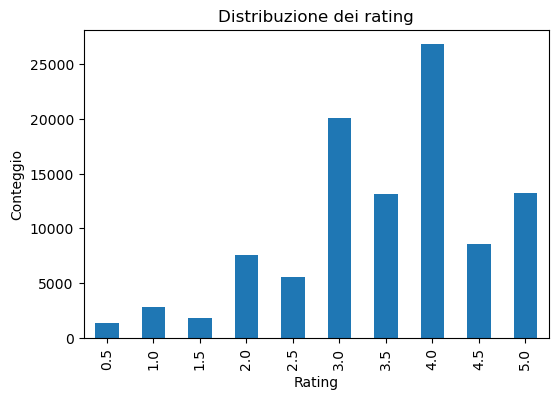

In [6]:
#Distribuzione dei rating
rating_counts = df_ratings["rating"].value_counts().sort_index()

print("Distribuzione dei rating:")
print(rating_counts)

rating_counts.plot(kind="bar", figsize=(6,4))
plt.title("Distribuzione dei rating")
plt.xlabel("Rating")
plt.ylabel("Conteggio")
plt.show()

In [7]:
#avg rating for film
movie_avg_rating = df_ratings.groupby("movieId")["rating"].mean().sort_values(ascending=False)

print("Rating medio per film (prime 10 righe):")
print(movie_avg_rating.head(10))

#count rating for film
movie_popularity = df_ratings.groupby("movieId")["rating"].count().sort_values(ascending=False)

print("Film più popolari (per numero di rating):")
print(movie_popularity.head(10))

df_movie_stats = pd.DataFrame({
    "avg_rating": movie_avg_rating,
    "num_ratings": movie_popularity
})

print(df_movie_stats.head(10))

Rating medio per film (prime 10 righe):
movieId
187717    5.0
6983      5.0
5328      5.0
95843     5.0
3941      5.0
3940      5.0
3939      5.0
7815      5.0
162414    5.0
162344    5.0
Name: rating, dtype: float64
Film più popolari (per numero di rating):
movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: rating, dtype: int64
         avg_rating  num_ratings
movieId                         
1          3.920930          215
2          3.431818          110
3          3.259615           52
4          2.357143            7
5          3.071429           49
6          3.946078          102
7          3.185185           54
8          2.875000            8
9          3.125000           16
10         3.496212          132


In [8]:
#avg rating for user(bias positivo per utenti che votano sempre alto e analogo per basso)
user_avg_rating = df_ratings.groupby("userId")["rating"].mean()

print("Rating medio per utente (prime 10 righe):")
print(user_avg_rating.sort_values(ascending=False).head(10))

#utenti piu attivi(minimo di 20 recensioni per ogni users)
user_activity = df_ratings.groupby("userId")["rating"].count()

print("Utenti più attivi:")
print(user_activity.sort_values(ascending=False).head(10))
  
df_user__stats = pd.DataFrame({
    "avg_rating": user_avg_rating,
    "num_ratings": user_activity
})
print("\nPrime 10 righe di df_user_stats:")
print(df_user__stats.head(10))

Rating medio per utente (prime 10 righe):
userId
53     5.000000
251    4.869565
515    4.846154
25     4.807692
30     4.735294
523    4.693333
348    4.672727
171    4.634146
452    4.556931
43     4.552632
Name: rating, dtype: float64
Utenti più attivi:
userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
Name: rating, dtype: int64

Prime 10 righe di df_user_stats:
        avg_rating  num_ratings
userId                         
1         4.366379          232
2         3.948276           29
3         2.435897           39
4         3.555556          216
5         3.636364           44
6         3.493631          314
7         3.230263          152
8         3.574468           47
9         3.260870           46
10        3.278571          140


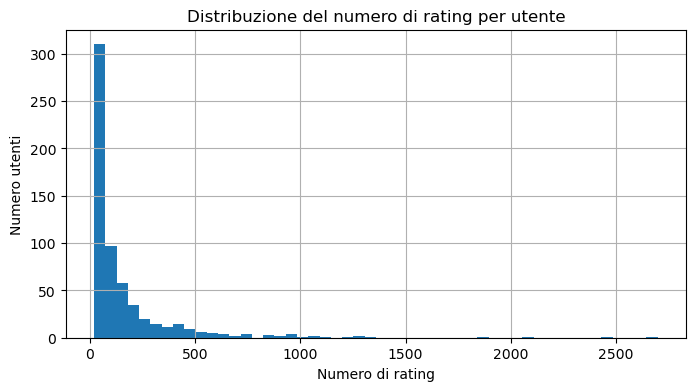

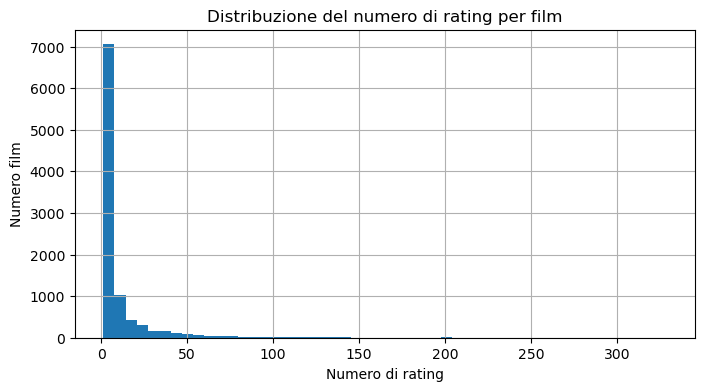

In [9]:
df_ratings.groupby("userId")["rating"].count().hist(bins=50, figsize=(8,4))
plt.title("Distribuzione del numero di rating per utente")
plt.xlabel("Numero di rating")
plt.ylabel("Numero utenti")
plt.show()


df_ratings.groupby("movieId")["rating"].count().hist(bins=50, figsize=(8,4))
plt.title("Distribuzione del numero di rating per film")
plt.xlabel("Numero di rating")
plt.ylabel("Numero film")
plt.show()

ANALISI TAGS

In [10]:
print(df_tags.head(10))

   userId  movieId                tag   timestamp
0       2    60756              funny  1445714994
1       2    60756    Highly quotable  1445714996
2       2    60756       will ferrell  1445714992
3       2    89774       Boxing story  1445715207
4       2    89774                MMA  1445715200
5       2    89774          Tom Hardy  1445715205
6       2   106782              drugs  1445715054
7       2   106782  Leonardo DiCaprio  1445715051
8       2   106782    Martin Scorsese  1445715056
9       7    48516       way too long  1169687325


Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
Numero di tag : 14732
Numero di tag unici: 1589
Tag più frequenti:
tag
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
surreal               23
funny                 23
Disney                23
religion              22
quirky                21
sci-fi                21
Name: count, dtype: int64
Numero di tag che sono stati scritti solo una volta: 1038


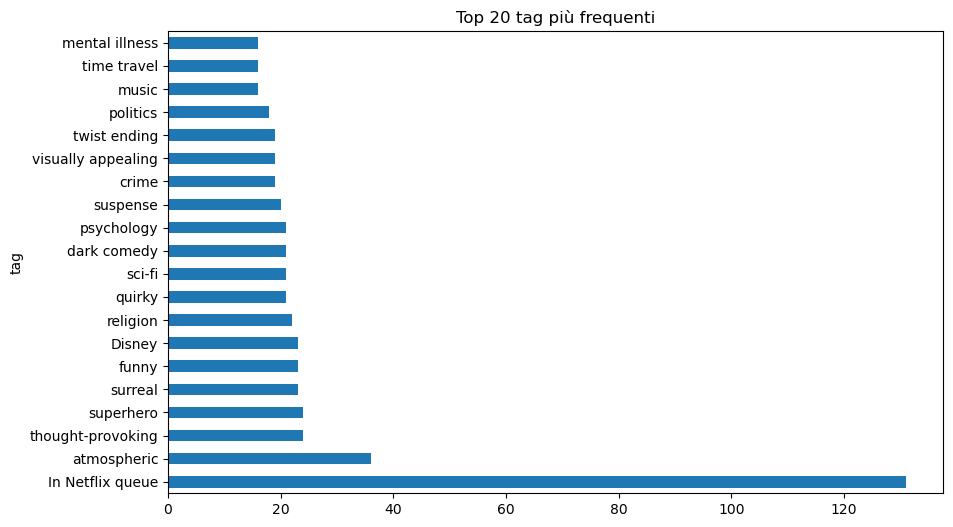

In [11]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

print(df_tags.columns)
print("Numero di tag :",df_tags.size)

# Quanti tag esistono
num_unique_tags = df_tags['tag'].nunique()
print("Numero di tag unici:", num_unique_tags)

# Distribuzione dei tag più frequenti
tag_counts = df_tags['tag'].value_counts()
print("Tag più frequenti:")
print(tag_counts.head(10))

tag_counts_filtered = tag_counts[tag_counts == 1]  # qui >=1 è ridondante, ma puoi cambiare soglia

print("Numero di tag che sono stati scritti solo una volta:",tag_counts_filtered.count())

# Grafico tag più frequenti
tag_counts.head(20).plot(kind='barh', figsize=(10,6))
plt.title("Top 20 tag più frequenti")
plt.show()

#inutile
#tag_counts.head(20).plot(kind='barh', figsize=(10,6))
#plt.title("Top 20 tag piu frequenti")
#plt.show()


Distribuzione tag per film:
count    1572.000000
mean        2.342875
std         5.562342
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       181.000000
Name: tag, dtype: float64


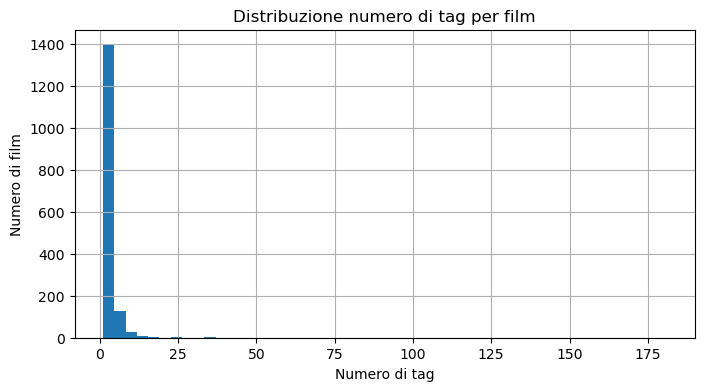

In [13]:
# Numero di tag per film
tags_per_movie = df_tags.groupby("movieId")["tag"].count()

print("Distribuzione tag per film:")
print(tags_per_movie.describe())

# Grafico
tags_per_movie.hist(bins=50, figsize=(8,4))
plt.title("Distribuzione numero di tag per film")
plt.xlabel("Numero di tag")
plt.ylabel("Numero di film")
plt.show()
